## <center> Random Forest 

Why Random Forest  --> Decision Tree has many leaves <br>
Random Forest is a collection of Decision Tree <br>


How does a Random Forest gets build<br>
Bagging Technique(Ensemble)<br>
For Object it will take macx occurances <br>
For Numeric it will be mean or average 

Bootstrapping  is:- <br> random selection of features with replacement <br> Fixed Number of features

Random Forest is a Bagging Techniuqe where bagging means all decision trees are built in parallel <br>
Boosting Technique is where all trees are dependent of eachother(Random forest is not a boosting technique)

#### Hyper Parameter Tuning
1)Trees<br>2)Features in trees<br>3)Other HPT of Decision Tree 

Random Forest Follows <b>CART</b> model<br>i.e it can be used for regression and classification

Just like in DT , in Random forest we have important features 

<i><u>Random Forest cannot Handle Multicolinearity in the numeric data</u></i>

In [44]:
#importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score,classification_report

In [4]:
filename = 'ctg.csv'
ctg =pd.read_csv(filename)

In [7]:
print(ctg.head())

    LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  ...  Min  Max  Nmax  Nzeros  \
0  120   0   0   0   0   0   0    73   0.5    43  ...   62  126     2       0   
1  132   4   0   4   2   0   0    17   2.1     0  ...   68  198     6       1   
2  133   2   0   5   2   0   0    16   2.1     0  ...   68  198     5       1   
3  134   2   0   6   2   0   0    16   2.4     0  ...   53  170    11       0   
4  132   4   0   5   0   0   0    16   2.4     0  ...   53  170     9       0   

   Mode  Mean  Median  Variance  Tendency  NSP  
0   120   137     121        73         1    2  
1   141   136     140        12         0    1  
2   141   135     138        13         0    1  
3   137   134     137        13         1    1  
4   137   136     138        11         1    1  

[5 rows x 22 columns]


In [8]:
ctg.shape

(2126, 22)

In [9]:
#store columns names # To Check multicolinearity 
cols = list(ctg.columns)

In [11]:
cols.remove('NSP')

In [12]:
cols

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency']

In [13]:
#Check for nulls 
ctg.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [14]:
#Check for 0's 
ctg[ctg==0].count()

LB             0
AC           891
FM          1311
UC           332
DL          1231
DS          2119
DP          1948
ASTV           0
MSTV           0
ALTV        1240
MLTV         137
Width          0
Min            0
Max            0
Nmax         107
Nzeros      1624
Mode           0
Mean           0
Median         0
Variance     187
Tendency    1115
NSP            0
dtype: int64

<AxesSubplot:>

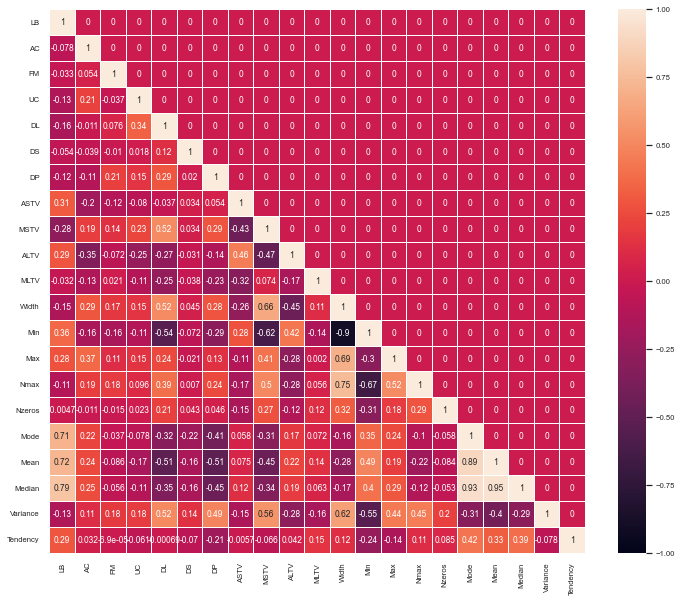

In [39]:
cor =ctg[cols].corr()
cor= np.tril(cor)
sns.set(rc={'figure.figsize':(12,10)},font_scale=0.7)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,vmin= -1 ,vmax =1 ,square=False,linewidths=0.5,annot =True)

In [40]:
ctg.NSP.value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [41]:
#Split data in training and testing
trainx,testx,trainy,testy = train_test_split(ctg.drop('NSP',1),ctg.NSP,test_size=0.3)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_14016/2671687744.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainy,testy = train_test_split(ctg.drop('NSP',1),ctg.NSP,test_size=0.3)


In [43]:
(trainx.shape,trainy.shape,testx.shape,testy.shape)

((1488, 21), (1488,), (638, 21), (638,))

In [45]:
#Build RF classifier 
#n_estimators = total number of DT to be built 
#max_features = 
m1 = rfc(n_estimators=40,max_features=2 ).fit(trainx,trainy)
m1.estimators_

[DecisionTreeClassifier(max_features=2, random_state=269363850),
 DecisionTreeClassifier(max_features=2, random_state=1198551581),
 DecisionTreeClassifier(max_features=2, random_state=1176571559),
 DecisionTreeClassifier(max_features=2, random_state=1408323997),
 DecisionTreeClassifier(max_features=2, random_state=1206173907),
 DecisionTreeClassifier(max_features=2, random_state=1821791537),
 DecisionTreeClassifier(max_features=2, random_state=908721557),
 DecisionTreeClassifier(max_features=2, random_state=1321758270),
 DecisionTreeClassifier(max_features=2, random_state=1766393292),
 DecisionTreeClassifier(max_features=2, random_state=147570002),
 DecisionTreeClassifier(max_features=2, random_state=81577452),
 DecisionTreeClassifier(max_features=2, random_state=515381948),
 DecisionTreeClassifier(max_features=2, random_state=673455726),
 DecisionTreeClassifier(max_features=2, random_state=392549072),
 DecisionTreeClassifier(max_features=2, random_state=1237387293),
 DecisionTreeClass

In [47]:
#prediction
p1 = m1.predict(testx)

In [48]:
#Evaluate the model
#1) Accuracy 
print("Model Accuracy ={}".format(accuracy_score(testy,p1)))

Model Accuracy =0.9341692789968652


In [50]:
#2)Confusion Matrix
res = pd.DataFrame({'actual':testy ,'predicted':p1})
pd.crosstab(res.actual,res.predicted,margins= True)

predicted,1,2,3,All
actual,,,,
1,489,8,0,497
2,24,65,4,93
3,0,6,42,48
All,513,79,46,638


In [51]:
#3) Classification Report 
print(classification_report(res.actual,res.predicted))

              precision    recall  f1-score   support

           1       0.95      0.98      0.97       497
           2       0.82      0.70      0.76        93
           3       0.91      0.88      0.89        48

    accuracy                           0.93       638
   macro avg       0.90      0.85      0.87       638
weighted avg       0.93      0.93      0.93       638



In [52]:
#Feature Selection can be done by 1)HeatMap(drop highly correlated variable) 2)Singualrity

In [53]:
#important features 
#1) Heatmap(check for multicolinearity)
#2)Singularities 
#3)Feature importance from model

df_feat_scores = pd.DataFrame({'features':cols,
                              'score':m1.feature_importances_})

In [55]:
#sort the dat in descending order
df_feat_scores = df_feat_scores.sort_values('score',ascending=False)
print(df_feat_scores)

    features     score
7       ASTV  0.105400
8       MSTV  0.099257
9       ALTV  0.097249
16      Mode  0.081287
17      Mean  0.072461
18    Median  0.053383
10      MLTV  0.052809
6         DP  0.052717
19  Variance  0.051420
12       Min  0.049269
11     Width  0.047469
0         LB  0.044897
1         AC  0.038535
13       Max  0.038441
3         UC  0.037688
14      Nmax  0.023943
2         FM  0.023459
20  Tendency  0.011929
4         DL  0.010975
15    Nzeros  0.005419
5         DS  0.001993
